## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Time is ticking. Good luck! 

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [79]:
hotels = pd.read_csv("hotel_bookings.csv")
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [80]:
hotels.shape

(36275, 19)

In [81]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


**Observations**

- Hotel bookings file contains 14 floats and 5 objects dataypes. some of which needs to be converted to **int** datatype because the values in somes of the columns are discreet and not continuous values.

- The file contains 36275 rows and 19 columns.

- Printing few rows of hotel booking file I noticed Booking_ID was considered as a separate column, hence it will be set as index.

In [82]:
hotels = hotels.set_index('Booking_ID')

In [83]:
hotels.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [84]:
hotels.isna().sum()

no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

Few data are missing in each columns

In [85]:
#drop missing data
hotels.dropna(inplace=True)

In [86]:
#Datatype conversion

hotels = hotels.astype({"no_of_adults": int, "no_of_children": int, "no_of_weekend_nights": int, "no_of_weekend_nights": int, "no_of_week_nights": int, "lead_time": int, "arrival_year": int, "arrival_date": int, "repeated_guest": int, "no_of_previous_cancellations": int, "no_of_previous_bookings_not_canceled": int, "no_of_special_requests": int})

In [87]:
hotels['arrival_month'] = hotels['arrival_month'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).astype(object)

In [88]:
hotels['arrival_month'].value_counts()

arrival_month
Oct    4046
Sep    3494
Aug    2873
Jun    2475
Dec    2277
Nov    2251
Jul    2216
Apr    2075
May    1991
Mar    1779
Feb    1266
Jan     768
Name: count, dtype: int64

In [89]:
hotels['booking_status'] = hotels['booking_status'].replace(['Not_Canceled', 'Canceled'], [0, 1]).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_8124\3522428241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hotels['booking_status'] = hotels['booking_status'].replace(['Not_Canceled', 'Canceled'], [0, 1]).astype(int)


In [90]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27511 entries, INN00002 to INN36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          27511 non-null  int32  
 1   no_of_children                        27511 non-null  int32  
 2   no_of_weekend_nights                  27511 non-null  int32  
 3   no_of_week_nights                     27511 non-null  int32  
 4   type_of_meal_plan                     27511 non-null  object 
 5   required_car_parking_space            27511 non-null  float64
 6   room_type_reserved                    27511 non-null  object 
 7   lead_time                             27511 non-null  int32  
 8   arrival_year                          27511 non-null  int32  
 9   arrival_month                         27511 non-null  object 
 10  arrival_date                          27511 non-null  int32  
 11  market_seg

**Changes I made**


- I dropped all missing rows
- I did datatype conversion on some columns
- Instead of having numbers in the arrival columns, I replaced each month number with appropriate month name and it can be seen that most customers arrive in october while least customers arrive in january 
- I replaced Not canceled and Canceled in 'booking_status' columns with 0 and 1 so as to perform some computation

In [91]:
hotels.select_dtypes(object).nunique()

type_of_meal_plan       4
room_type_reserved      7
arrival_month          12
market_segment_type     5
dtype: int64

**Observations**

- There are four different types of meal plan
- There are seven different types of 'room_type_reserved'
- 12 distinct arrival month
- 5 unique market segment type


Lets take a look at object datatypes

In [92]:
hotels.select_dtypes(object).head()



,type_of_meal_plan,room_type_reserved,arrival_month,market_segment_type
Booking_ID,,,,
INN00002,Not Selected,Room_Type 1,Nov,Online
INN00003,Meal Plan 1,Room_Type 1,Feb,Online
INN00004,Meal Plan 1,Room_Type 1,May,Online
INN00005,Not Selected,Room_Type 1,Apr,Online
INN00006,Meal Plan 2,Room_Type 1,Sep,Online


In [93]:
hotels.select_dtypes(include=object).describe()

,type_of_meal_plan,room_type_reserved,arrival_month,market_segment_type
count,27511,27511,27511,27511
unique,4,7,12,5
top,Meal Plan 1,Room_Type 1,Oct,Online
freq,21161,21320,4046,17599


**Observation**

- Meal plan 1 is the most frequent ordered type of meal plan
- Room type 1 is also the most frequent booked "room_type_reserved"
- Customers arrive mostly in Octber
- Most of the booking was made online

In [94]:
hotels.select_dtypes('number').nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       7
no_of_week_nights                         18
required_car_parking_space                 2
lead_time                                347
arrival_year                               2
arrival_date                              31
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      58
avg_price_per_room                      3411
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [95]:
hotels.select_dtypes('number').head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,
INN00002,2,0,2,3,0.0,5,2018,6,0,0,0,106.68,1,0
INN00003,1,0,2,1,0.0,1,2018,28,0,0,0,60.00,0,1
INN00004,2,0,0,2,0.0,211,2018,20,0,0,0,100.00,0,1
INN00005,2,0,1,1,0.0,48,2018,11,0,0,0,94.50,0,1
INN00006,2,0,0,2,0.0,346,2018,13,0,0,0,115.00,1,1


In [96]:
hotels.select_dtypes(include='number').describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000,27511.000000
mean,1.845153,0.105558,0.813347,2.203119,0.031188,85.286467,2017.821162,15.584675,0.026171,0.024790,0.163571,103.538728,0.619607,0.327505
std,0.517605,0.407020,0.870882,1.407811,0.173827,86.098013,0.383223,8.732747,0.159648,0.381654,1.872857,35.217580,0.784811,0.469312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,23.000000,0.000000,0.000000,0.000000,120.280000,1.000000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


**Observations**

- Minimum of 0 adult made a booking i.e it is possible that no booking was made by adult and also, Maximum no. of 4 adults made a booking i.e atmost 4 adults made a booking(one booking), it can be less than but not more than according to Hotel booking csv file


- No of Children also has minimum of 0 and Maximum of 10.
- The average price paid for a room is 103.5387...
- On an average 33% of customers canceled their booking
- The mean of previous cancellation is approximately 2.5% 

In [97]:
hotels['no_of_previous_cancellations'].value_counts().sort_values()

no_of_previous_cancellations
6         1
13        4
4        10
5        11
11       19
3        32
2        33
1       158
0     27243
Name: count, dtype: int64

Here, it can be seen that 0 cancellation was made by 27243 customers while the highest cancellation which is 13 was made 4 customers, with distinct booking Id.

In [98]:
pd.crosstab(index=hotels['no_of_previous_cancellations'],columns='count',normalize=True)*100

col_0,count
no_of_previous_cancellations,
0,99.025844
1,0.574316
2,0.119952
3,0.116317
4,0.036349
5,0.039984
6,0.003635
11,0.069063
13,0.014540


99% of bookings has 0 previous cancellation while 0.015% has 13 cancellation

In [99]:
pd.crosstab(index=hotels['no_of_previous_cancellations'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_previous_cancellations,,,
0,0.663117,0.327142,0.990258
1,0.005525,0.000218,0.005743
2,0.001200,0.000000,0.001200
3,0.001163,0.000000,0.001163
4,0.000363,0.000000,0.000363
5,0.000400,0.000000,0.000400
6,0.000036,0.000000,0.000036
11,0.000691,0.000000,0.000691
13,0.000000,0.000145,0.000145


**Observation**

For 0 previous cancellation
Chances that bookings will not be canceled is 66.3% and,
Chances that booking will be cancelled is 32.7 i.e it is possible that 32.7% of customers that made 0 previous cancellation will canceled their current booking.

2, 3, 4, 5, and 6 previous cancellation have chances of not being canceled (even though the chances are small) 


1 previous cancellation has small chances of Not being canceled and being canceled and  13 previous cancelation has  0 chances of not being canceled and and 0.00015 of being cancelledn i.e there is 0.00015 chances that 4 customers with distinct id  that made 13 previous cancellation will also cancel their current booking


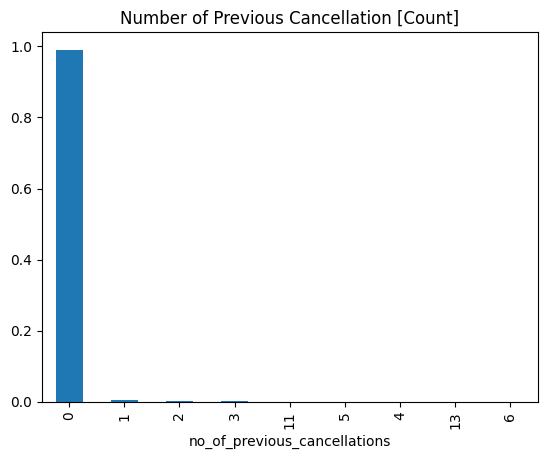

In [100]:
hotels["no_of_previous_cancellations"].value_counts(normalize=True).plot(kind='bar')
plt.title("Number of Previous Cancellation [Count]");


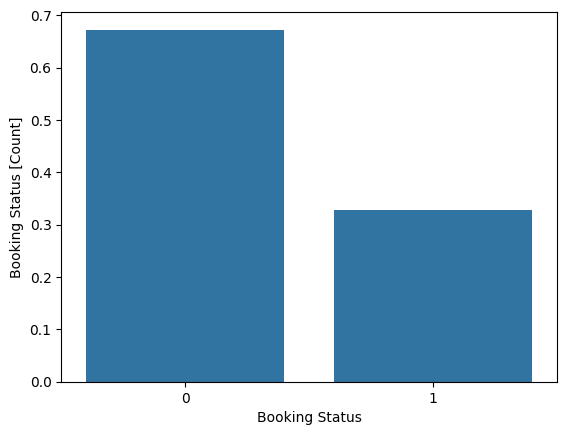

In [101]:
sns.barplot(x=hotels['booking_status'].unique(), y=hotels['booking_status'].value_counts(normalize=True))
plt.xlabel("Booking Status")
plt.ylabel("Booking Status [Count]");

**Observation**

Approximately 33% of bookings where canceled and 67% were not canceled

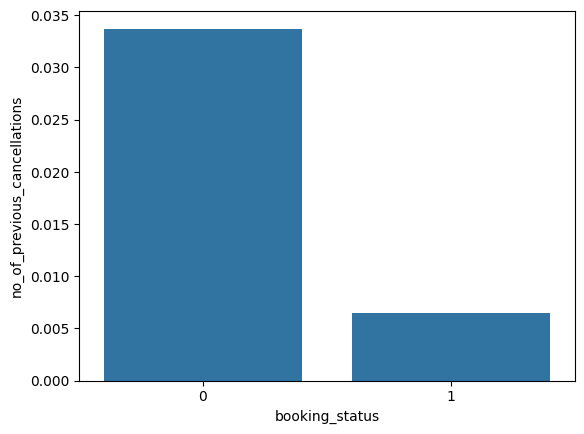

In [102]:
sns.barplot(x='booking_status', y='no_of_previous_cancellations', errorbar=None, data=hotels);

Around 7% of customers that made previous cancellation, also canceled their bookings

In [103]:
average_cancellation_per_customer= hotels.groupby("arrival_month")['no_of_previous_cancellations'].mean().to_frame()

average_cancellation_per_customer.columns= ["no_of_previous_cancellation"]

average_cancellation_per_customer.sort_values(by='no_of_previous_cancellation', ascending=False, inplace=True,)


average_cancellation_per_customer

,no_of_previous_cancellation
arrival_month,
Jan,0.253906
Feb,0.042654
Dec,0.032499
Apr,0.029398
Nov,0.020880
Oct,0.020514
May,0.017077
Sep,0.016600
Jul,0.013087


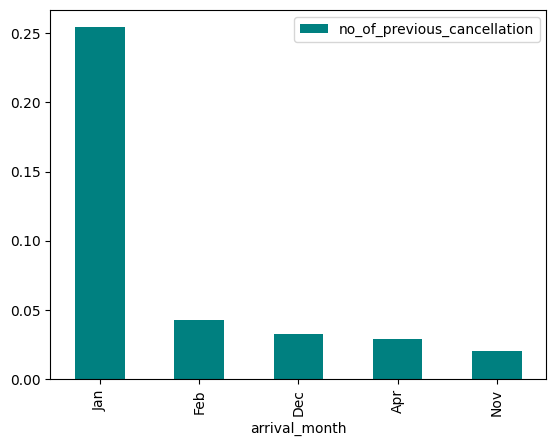

In [104]:
average_cancellation_per_customer[:5].plot(kind='bar', color='teal')
plt.show()

Highest previous cancellation happens in month of  January

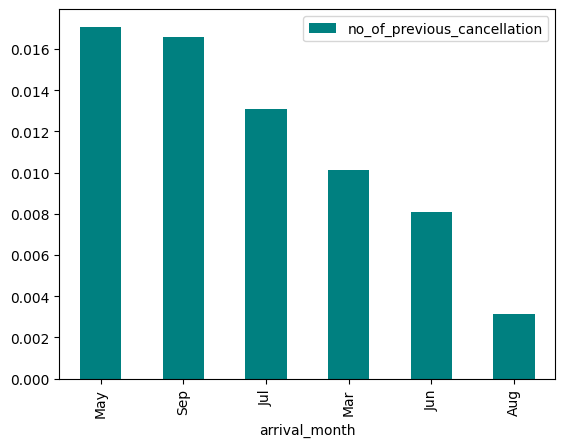

In [105]:
average_cancellation_per_customer[6:].plot(kind='bar', color='teal')
plt.show()

The Least previous cancellation happens in the month of August

In [106]:
pd.crosstab(index=hotels['no_of_adults'],columns='count',normalize=True)

col_0,count
no_of_adults,
0,0.003744
1,0.211770
2,0.720439
3,0.063684
4,0.000363


In [107]:
pd.crosstab(index=hotels['no_of_adults'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_adults,,,
0,0.002508,0.001236,0.003744
1,0.161317,0.050453,0.211770
2,0.468613,0.251827,0.720439
3,0.039802,0.023881,0.063684
4,0.000254,0.000109,0.000363
All,0.672495,0.327505,1.000000


**Observations**

0 and 4 adults have less than 1% probaility of making a booking

2 adults has the highest chance of making a booking which is approximately 72%, followed by 3 adults which has 21% and then 3 adults have 6.4% chances of makin a booking.


**For 1 adult**
- the likelyhood of booking being canceled is 25.2%
- and the likelyhood of booking not canceled is 46.9%



**For 2 adults**
- the likelyhood of booking being canceled is 5.0%
- and the likelyhood of booking not canceled is 16%



**For 3 adults**
- the likelyhood of booking being canceled is 2.39%
- and the likelyhood of booking not canceled is 3.98%



**For 4 adults**
- the likelyhood of canceled and not canceled is less than 1%

**Observation**




I checked if there's relationship between adults and children i.e if most adult that made a booking go with children

In [108]:
pd.crosstab(index=hotels['no_of_children'],columns='count',normalize=True)

col_0,count
no_of_children,
0,0.926139
1,0.043546
2,0.029625
3,0.000582
9,0.000073
10,0.000036


In [109]:
pd.crosstab(index=hotels['no_of_children'],columns=hotels['no_of_adults'],normalize=True,margins=True)

no_of_adults,0,1,2,3,4,All
no_of_children,,,,,,
0,0.000000,0.207808,0.654938,0.063029,0.000363,0.926139
1,0.000000,0.002290,0.040638,0.000618,0.000000,0.043546
2,0.003599,0.001636,0.024354,0.000036,0.000000,0.029625
3,0.000145,0.000000,0.000436,0.000000,0.000000,0.000582
9,0.000000,0.000036,0.000036,0.000000,0.000000,0.000073
10,0.000000,0.000000,0.000036,0.000000,0.000000,0.000036
All,0.003744,0.211770,0.720439,0.063684,0.000363,1.000000


**Observations**

it can be seen that
- 4 adults have less than 1 percent chances of making bookings with children
- 3 adults have 6.4% of making bookings with childeren
- 2 adults have the highest likelyood of making bookings with children which is 72% chances, one intresting thing to note is that out of the 72%, there is approximately 65.4% that 2 adults will book an hotel with 0 children.

- 1 adult has the 21.1% of making bookings with children and there's 20% chances 1 adult made bookings with 0 children.

The inference that can be drawn from this is that most adults don't book an hotel their with children


In [110]:
pd.crosstab(index=hotels['no_of_children'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_children,,,
0,0.626295,0.299844,0.926139
1,0.029116,0.014431,0.043546
2,0.016612,0.013013,0.029625
3,0.000400,0.000182,0.000582
9,0.000036,0.000036,0.000073
10,0.000036,0.000000,0.000036
All,0.672495,0.327505,1.000000


**Observation**

bookings with 0 children i.e with no children has approximately 30% of canceled and 63% of not cancelled

the rest of booking with children has small chances of canceled and not canceled

Lets check how 'room_type_reserved' affect booking status

In [111]:
pd.crosstab(index=hotels['room_type_reserved'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
room_type_reserved,,,
Room_Type 1,0.525281,0.249682,0.774963
Room_Type 2,0.012795,0.006288,0.019083
Room_Type 3,0.000109,0.000073,0.000182
Room_Type 4,0.110029,0.056668,0.166697
Room_Type 5,0.005307,0.001999,0.007306
Room_Type 6,0.015521,0.011777,0.027298
Room_Type 7,0.003453,0.001018,0.004471
All,0.672495,0.327505,1.000000


**Observation**

Room Type 1 has the highest chances of not canceled and also the higest chances of canceled which are aproximately 53% and and 25% repectively.

Room type 4 has 11 booked has 11% of not canceled and approximately 5.7 of being canceled

The rest of the room types have small percentages of canceled and not canceled

<Axes: xlabel='booking_status'>

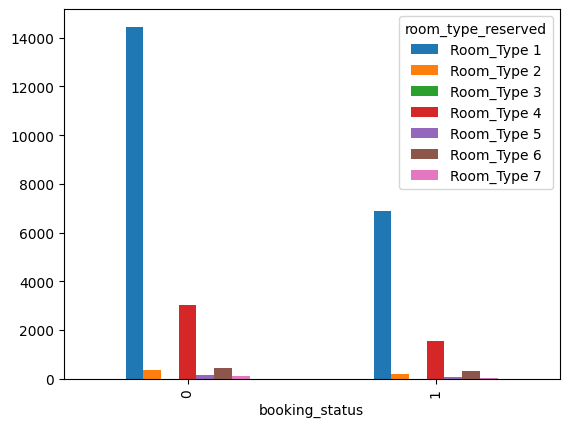

In [112]:
hotels_1= hotels.groupby(['booking_status', 'room_type_reserved']).size()
hotels_1 = hotels_1.unstack()
hotels_1.plot(kind='bar')


<Axes: xlabel='type_of_meal_plan'>

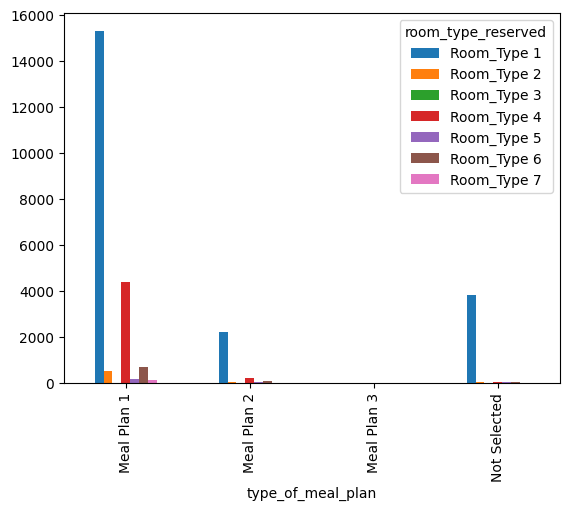

In [113]:
hotels_1= hotels.groupby(['type_of_meal_plan', 'room_type_reserved']).size()
hotels_1 = hotels_1.unstack()
hotels_1.plot(kind='bar')

**Observation**

The first bar chart shows that among all the 'room_type_reserved', room_type 1 has the highest reseravation.
among not cancelled it has the highest percentage and among the canceled it also has the highest percentage



The second bar chart shows the relationship between 'type_of_meal_plan' and 'room_type_reserved'. 
This visualization is done in other to check for the preferred meal or most ordered meal in each room

It can be seen that Meal plan 1 is the most preferred in all room_types except room 3,
meal plan 3 is barely ordered or not ordered at all, Approximately 4000 of customers that booked room_type 1 didn't select any meal plan, reserved room type didn't select any meal plans too but there were not as significant as room_type 1.

perharps they don't like any of the meal plan and this might lead to cancellation of booking 


In [114]:
pd.crosstab(index=hotels['no_of_weekend_nights'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_weekend_nights,,,
0,0.324270,0.139290,0.463560
1,0.180946,0.094798,0.275744
2,0.163607,0.088110,0.251717
3,0.002181,0.001854,0.004035
4,0.001163,0.002145,0.003308
5,0.000182,0.000800,0.000981
6,0.000145,0.000509,0.000654
All,0.672495,0.327505,1.000000


**Observation**
Approximately 46.4% customers booked 0 weekend nights, since its 0 'no_of_weekend_nights' the chances of its cancellation and not canceled are not significant e.g its not possible to return what one didn't buy. same thing apply its not possible to cancel 'weekend_nights' that wasn't booked.

1 and 2 'no_of_weekend_nights' have high percentage of cancellation which are approximately 9.5% and 8.8% respectively compare to other 'no_of_weekend_nights'.

<Axes: xlabel='type_of_meal_plan'>

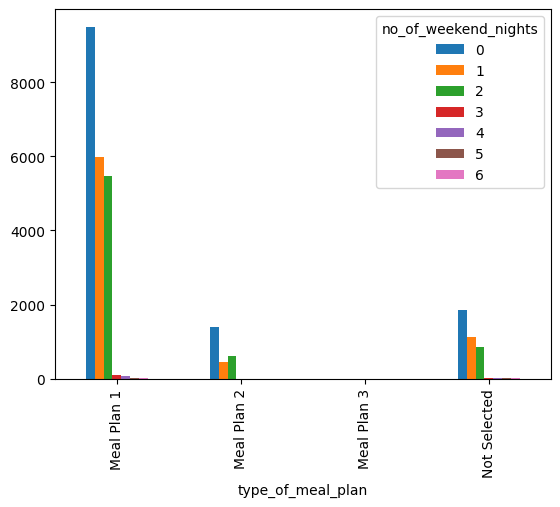

In [115]:
hotels_1= hotels.groupby(['type_of_meal_plan', 'no_of_weekend_nights']).size()
hotels_1 = hotels_1.unstack()
hotels_1.plot(kind='bar')

Observation

Meal plan 1 is basically the most preferred and also there are some customer which do not select any of the mean plans on 'no_of_weekend_nights'

In [116]:
pd.crosstab(index=hotels['no_of_week_nights'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_week_nights,,,
0,0.046163,0.018756,0.064919
1,0.191632,0.072189,0.263822
2,0.204573,0.109047,0.313620
3,0.146669,0.070481,0.217150
4,0.050671,0.031006,0.081676
5,0.026608,0.018284,0.044891
6,0.002835,0.002399,0.005234
7,0.001418,0.001454,0.002872
8,0.000945,0.000909,0.001854


**1, 2 and 3 'no_of_week_nights'** have the high chances of being canceled which are aproximately 7.2%, 11% and 7.0% respeectively

<Axes: xlabel='no_of_week_nights'>

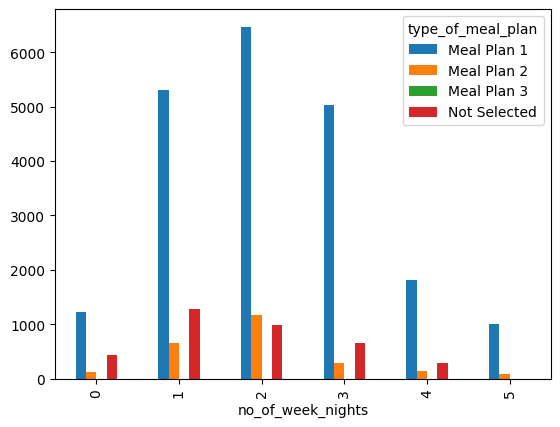

In [117]:
hotels_1= hotels.groupby(['no_of_week_nights', 'type_of_meal_plan']).size()
hotels_1 = hotels_1[:20].unstack()
hotels_1.plot(kind='bar')

In [118]:
pd.crosstab(index=hotels['required_car_parking_space'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
required_car_parking_space,,,
0.0,0.644506,0.324307,0.968812
1.0,0.027989,0.003199,0.031188
All,0.672495,0.327505,1.000000


Approximately  **96.8% the bookings dosen't require car park** 

-  the chances that booking will be canceled by customer that don't require car park is 32.4%

Approximately **3.1% of the bookings require car park**



 

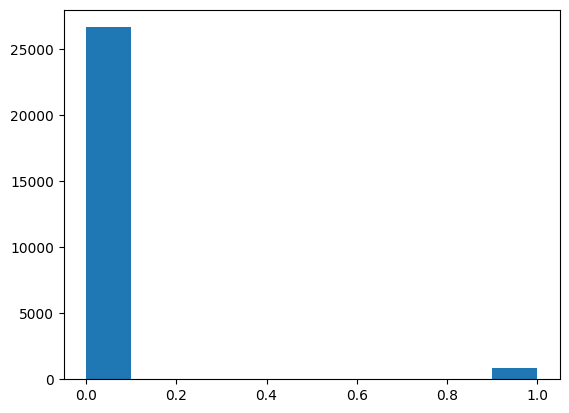

In [119]:
plt.hist(hotels["required_car_parking_space"]);


C:\Users\User\AppData\Local\Temp\ipykernel_8124\2742630584.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='booking_status',y='required_car_parking_space', ci=None, data=hotels);


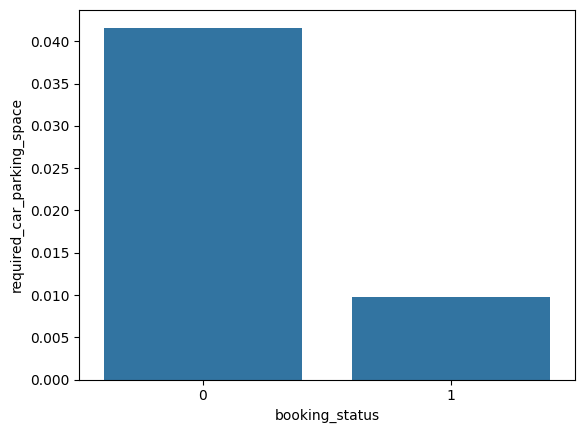

In [120]:
sns.barplot(x='booking_status',y='required_car_parking_space', ci=None, data=hotels);

In [121]:
pd.crosstab(index=hotels['lead_time'],columns='count',normalize=True)

col_0,count
lead_time,
0,0.035404
1,0.030133
2,0.017702
3,0.017120
4,0.017302
...,...
381,0.000036
386,0.002072
418,0.001527


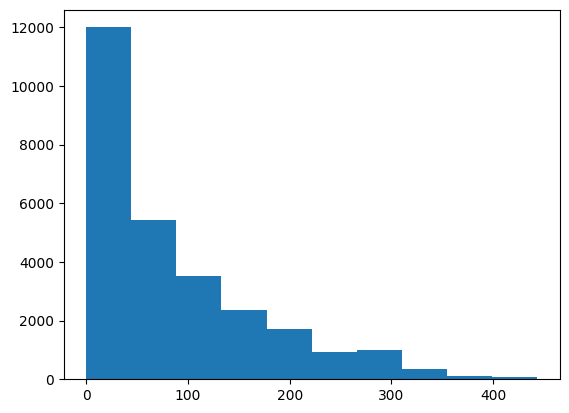

In [122]:
plt.hist(hotels["lead_time"]);

**Observation**

The data is positively skewed

Decline in numbers of bookings as lead time increases

lead time from 400 and above has the lowest booking

maximum number of booking was made between 0-50 lead time

In [123]:
pd.crosstab(
    index=hotels['arrival_year'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
arrival_year,,,
2017,0.152484,0.026353,0.178838
2018,0.520010,0.301152,0.821162
All,0.672495,0.327505,1.000000


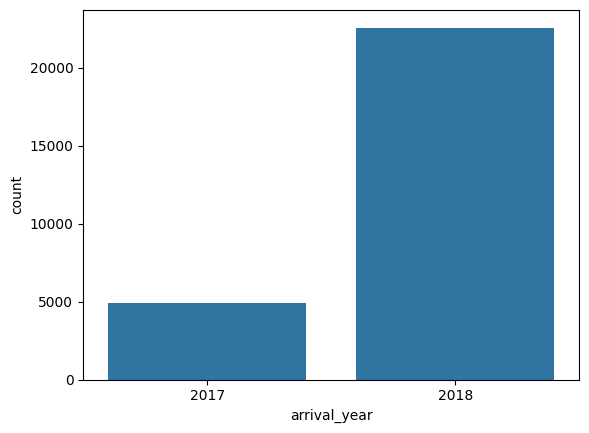

In [124]:
sns.countplot(x='arrival_year',data=hotels);

**Observations**

Majority of customers selected 2018 as their arrival year

Chances of bookings not canceled in 2018 is 52% and chances of booking canceled is 30%

The probability that booking was canceled in 2017 is 2.64% and the probability of not canceled is  15.2%

In [125]:
pd.crosstab(
    index=hotels['arrival_month'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
arrival_month,,,
Apr,0.047981,0.027444,0.075424
Aug,0.063684,0.040747,0.104431
Dec,0.071571,0.011196,0.082767
Feb,0.034059,0.011959,0.046018
Jan,0.027371,0.000545,0.027916
Jul,0.044091,0.036458,0.080550
Jun,0.054269,0.035695,0.089964
Mar,0.045291,0.019374,0.064665
May,0.046091,0.026280,0.072371


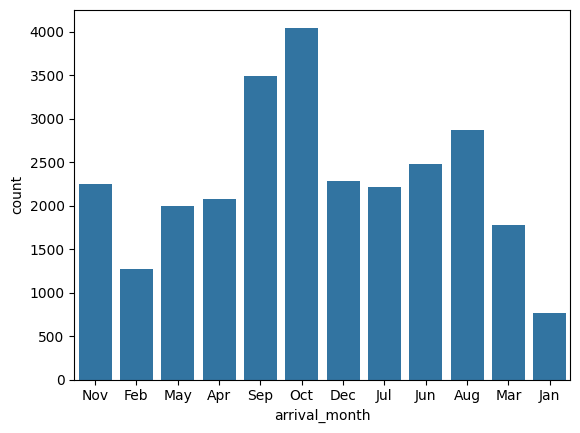

In [126]:
sns.countplot(x='arrival_month',data=hotels);

In [127]:
pd.crosstab(index=hotels['market_segment_type'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
market_segment_type,,,
Aviation,0.002544,0.001127,0.003671
Complementary,0.010868,0.000000,0.010868
Corporate,0.049617,0.005998,0.055614
Offline,0.202901,0.087238,0.290138
Online,0.406565,0.233143,0.639708
All,0.672495,0.327505,1.000000


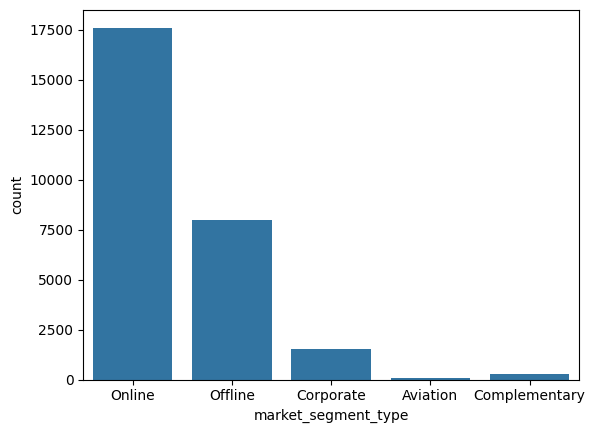

In [128]:
sns.countplot(x='market_segment_type',data=hotels);

**64% of bookings were made online.**

The chances that bookings made online were not canceled is 40.6% and the chances of canceled is 23.3%

**29% of bookings were made offline**

20.3% of bookings made offline were not canceled and 8.7 bookings made offline where canceled

In [129]:
pd.crosstab(index=hotels['repeated_guest'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
repeated_guest,,,
0,0.646687,0.327142,0.973829
1,0.025808,0.000363,0.026171
All,0.672495,0.327505,1.000000


**Observations**

Only 2.61% are repeated guest
The chances that repeated guest canceled their booking is lesss that 0.5%

97.4% are new guest
The chances that new guest canceled their booking is is 32.7


In [130]:
pd.crosstab(index=hotels['avg_price_per_room'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
avg_price_per_room,,,
0.0,0.015049,0.000073,0.015121
0.5,0.000036,0.000000,0.000036
1.0,0.000291,0.000000,0.000291
1.48,0.000036,0.000000,0.000036
1.6,0.000036,0.000000,0.000036
...,...,...,...
349.63,0.000036,0.000000,0.000036
365.0,0.000000,0.000036,0.000036
375.5,0.000036,0.000000,0.000036


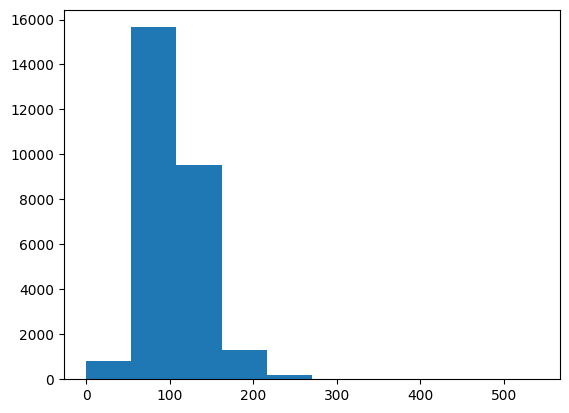

In [131]:
plt.hist(hotels["avg_price_per_room"]);


Most bookings price is between 50-100

Average price isn't greater than 300

In [132]:
pd.crosstab(index=hotels['no_of_special_requests'],columns=hotels['booking_status'],normalize=True,margins=True)

booking_status,0,1,All
no_of_special_requests,,,
0,0.309004,0.236087,0.545091
1,0.238886,0.073970,0.312857
2,0.104467,0.017448,0.121915
3,0.017884,0.000000,0.017884
4,0.001999,0.000000,0.001999
5,0.000254,0.000000,0.000254
All,0.672495,0.327505,1.000000


Approximately 55% of the bookings has no speacial request

The probability of bookings being canceled with no speacial request is 24%

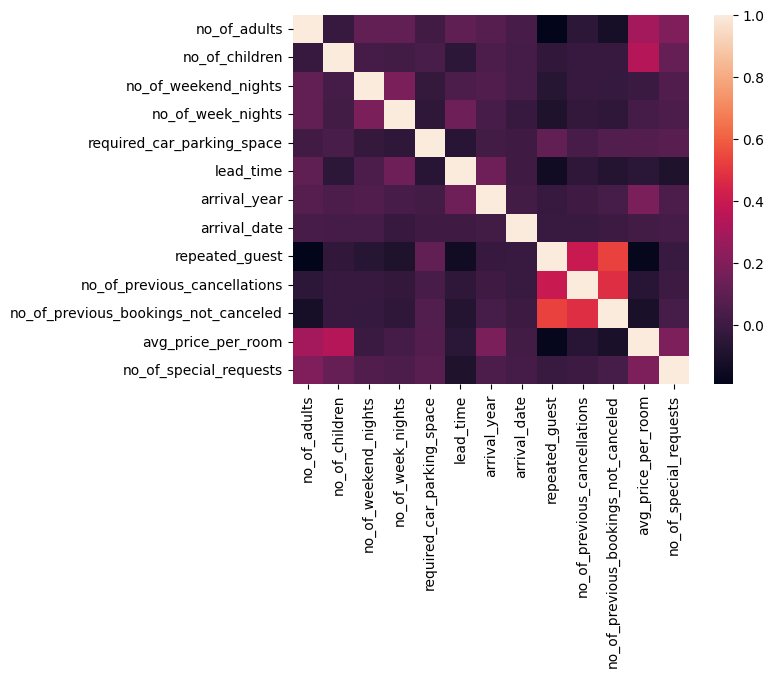

In [133]:
# Create correlation matrix
correlation = hotels.select_dtypes("number").drop(columns="booking_status").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

**Observation**

'no_of_previous_bookings_not_canceled' and 'repeated guest' have strong correlation. therefore one needs to be drop.



In [134]:
hotels['booking_status'].corr(hotels['no_of_previous_bookings_not_canceled'])

-0.060536493121325356

In [135]:
hotels['booking_status'].corr(hotels['repeated_guest'])

-0.10955117289639478

I decide which one to drop by checking the correlation of each with 'booking_status' and so the one that has strong correlation with booking status will be drop and that happens to be 'repeated_guest'

In [136]:
#drop multicolinearity columns

hotels.drop(columns=['repeated_guest'], inplace=True)

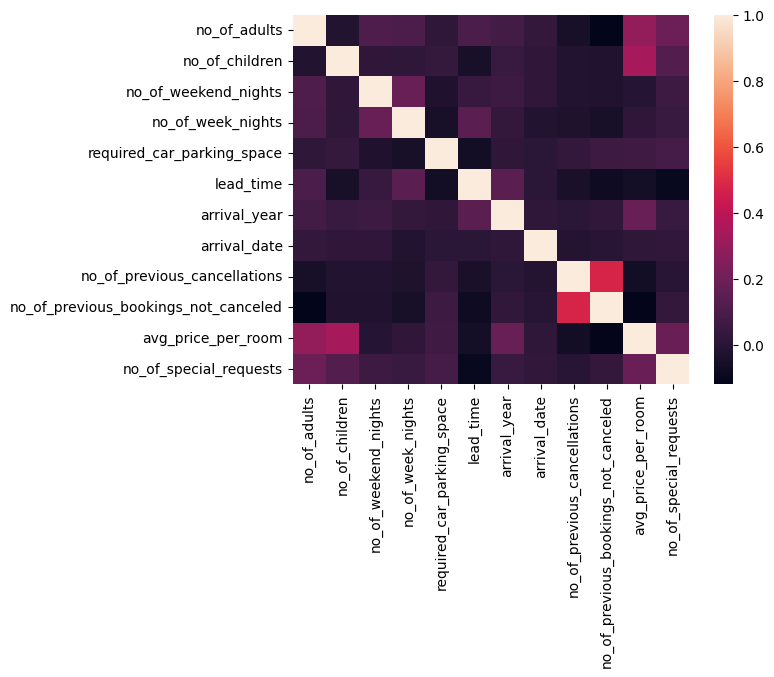

In [137]:
# Create correlation matrix
correlation = hotels.select_dtypes("number").drop(columns="booking_status").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

The heatmap above shows that issue of Multicolinearity has been solved

In [138]:
#drop leaky column
hotels.drop(columns=['no_of_previous_cancellations'], inplace = True)


**Building model**

In [139]:
target = "booking_status"
X = hotels.drop(columns=target)
y = hotels[target]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    
)

In [141]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [142]:
acc_baseline =y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.68


In [143]:
# Build model
model = make_pipeline(
    preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train, y_train)

C:\Users\User\anaconda3\envs\adun\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [144]:
acc_train =accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.81
Validation Accuracy: 0.8


In [145]:
Prediction= model.predict(X_test)

In [146]:
Prediction

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
submission = pd.DataFrame(index=X_test.index, data=Prediction)
submission.columns = ["booking_status"]

submission

,booking_status
Booking_ID,
INN16742,0
INN11944,0
INN33962,0
INN30461,0
INN31805,1
...,...
INN23697,0
INN04517,1
INN21815,0


In [148]:
y_test_pred_proba = model.predict_proba(X_test)
print(y_test_pred_proba[:5])

[[0.65121013 0.34878987]
 [0.90964255 0.09035745]
 [0.76062011 0.23937989]
 [0.78627976 0.21372024]
 [0.12002929 0.87997071]]


**REPORT**

1. Factors that affects whether customers cancel their booking


- Previous Cancellation affect whether a customers cancel their booking and mostly Customers with 0 previous cancellation contribute majorly to current cancellation with up to 32.7%



- 2 'no_of_adult' caused approximately 25% of booking cancellation



- Room type 1 contributes to booking cancellation with up to 25%,  foolowed by room type 4



- Lead time contribute to booking cancellation, the longer the lead time the higher in decline of numbers of booking



- When no special request is made it contributes to booking cancellation



- Customers don't usually other meal plan 3, in a case where only meal plan 3 is available at the moment customers may be forced to cancel their bookings especially if they are stay for more than 1 night.



- customers that doesn't require car parking space, contribute to booking cancellation by 32.4%


No, cancellation are not more likely during the weekend compare to the likelyhood during the week

**General Recommendations**

- Development of booking cancellation policy which must be strictly adhere to, so customers don't get comfortable canceling their booking with no tangible reason


- constantly getting feedback from customers to improve hotel services, this gives insight on what the customers expected from the hotel


- Taking complete payment at the time of booking, by doing this the hotel won't run at loss even if the customer didn't show up or decided to cancel the booking.


- Send bookings reminder such as email


- Getting in touch with customers as soon as they don't show up or cancel to their booking so as to find out possible reasons and ways to heelp them out



since room type 1 is mostly booked, features or decoration of room type 1 should be included in other rooms since it what customers preferred the most. In a situation where room type one has been booked and another customer  also wish to book room type 1 since it's no longer available the customers may decided to cancel the booking, but if other room types has room type one features it might be easy to convince the customer to make a substitution.

